<a href="https://colab.research.google.com/github/Thitichaya2000/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas 
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

In [2]:
Name = 'ฐิติชญา ไกรวงค์'
ID = '623020520-0'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

020:30:15


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,-1.431317,-3.805310,-1.683298,3.670962,5.333743,6.968222,5.297155,-0.622868,-8.659695,0.506338,-2.231758,-4.966134,2.878114,7.374850,1.860676,-0.038871,2.196023,11.370829,6.688385,6.105780,-4.416389,-4.717553,9.194900,0.249966,-1.970441,4.105653,3.420734,4.639702,-1.725424,9.603881,-7.610621,50.019407
1,-0.222700,-4.318604,-1.021648,4.262164,4.447866,10.645853,4.765258,-0.790480,-8.108423,-1.114622,-2.005512,-5.068586,4.139944,7.948390,4.017807,1.361718,3.219721,8.928908,6.658795,5.475026,-4.660510,-4.876859,7.906575,-0.422501,-2.430645,1.426361,4.555166,5.161480,-1.333644,9.095333,-8.637208,47.476663
2,-10.034376,6.161892,-3.954476,-8.050792,-5.352337,6.411617,-6.332182,-7.345645,-7.169272,10.553513,2.975710,0.441505,1.776539,7.340909,0.620935,3.145672,5.817364,8.331761,-8.568314,-4.763978,7.189534,0.715256,-2.086542,3.539530,0.488147,-3.906897,5.546570,-6.069777,7.307131,-8.493889,12.323783,-40.469445
3,2.807811,3.136014,3.270353,6.546945,-5.862550,-12.552502,6.869210,4.978822,-0.880895,7.677638,-2.179459,6.689613,5.866614,2.598473,11.440434,9.917409,6.283930,-1.044869,-11.599362,7.609711,-8.686592,-3.201546,-5.693836,10.478092,-5.883031,-4.733943,-2.132558,-9.512157,0.184631,-8.506297,6.272028,-40.531484
4,0.981739,5.057586,6.035421,6.643368,-9.726732,7.433159,8.389728,-5.688372,4.057948,-1.067151,-0.113727,3.773041,7.207748,8.921411,9.088559,3.895733,-7.498781,8.757467,-2.416330,4.642086,7.698492,-0.165685,6.799617,9.441419,10.733818,-3.927096,-4.872414,-7.582712,-0.734257,7.437834,10.115172,39.189171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8.570252,-8.547499,-6.627521,-0.738247,5.041646,8.379100,8.531765,1.861021,-1.478735,-1.421689,4.005371,2.120472,5.035665,-3.002748,8.055580,7.182527,-6.023813,2.258496,7.288834,-8.409583,-10.399815,7.948018,5.700540,6.105651,7.671632,-3.864644,-7.989939,5.141135,-1.598991,5.689240,-17.094999,30.446201
9996,-10.438886,5.510990,-1.623076,-9.326215,-6.385069,6.938657,-6.563878,-8.289501,-5.761271,7.928461,3.251750,1.482022,1.123383,5.989536,1.200461,0.735872,4.707533,8.231279,-10.546153,-4.309346,5.425850,2.465032,-3.326625,1.770823,2.090981,-3.050056,6.267379,-6.057672,8.780392,-10.478475,11.021979,-50.392375
9997,-2.171386,-3.572374,-2.281624,9.609861,3.647927,-7.071517,5.912975,-1.965732,6.946705,-2.177729,-5.651136,-0.720117,-7.696067,-6.032868,-3.678252,2.299576,-0.520670,6.917413,1.350440,-7.531208,6.656311,-5.945639,-10.804183,-1.086603,5.390014,-5.256982,-3.354696,9.149446,9.679640,3.251425,-7.144748,18.257126
9998,0.578091,6.232268,5.490281,5.679421,-9.322961,7.872634,8.821317,-4.478623,6.994061,-1.793188,0.012370,3.955197,8.481484,6.869151,11.919347,2.971310,-9.245483,6.041311,-1.832211,3.352620,8.421936,0.247541,7.469489,9.172441,11.945841,-4.429715,-6.446364,-4.332076,0.118959,7.302469,12.464536,38.512345


ทำการเตรียมข้อมูลก่อนจะนำข้อมูลไปใช้ โดยการตัดตัวที่มี correlation กันออกไป เพื่อลดข้อมูลที่เหมือนกันออกจาก Data

In [6]:
Data.shape #ดูขนาดของข้อมูล

(10000, 32)

In [7]:
corr = np.corrcoef(Data.to_numpy().T)

In [8]:
corr.shape #ดูขนาดของ corrcoef ของ Data

(32, 32)

In [67]:
#ทำการวนลูปหาค่า correlation ที่ซ้ำกัน
for i in range(corr.shape[0]):
    for j in range(corr.shape[1]):
        if (i !=j) and (corr[i,j] == 1.):
            print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')

row = 1 column = 30 corrcoef = 1.0
row = 29 column = 31 corrcoef = 1.0
row = 30 column = 1 corrcoef = 1.0
row = 31 column = 29 corrcoef = 1.0


จากการวนลูป พบว่า correlation มีตัวซ้ำกัน จึงต้องตัดข้อมูลออกก่อน

In [69]:
newdata = Data.iloc[1:,:31]
newdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30
1,-0.222700,-4.318604,-1.021648,4.262164,4.447866,10.645853,4.765258,-0.790480,-8.108423,-1.114622,-2.005512,-5.068586,4.139944,7.948390,4.017807,1.361718,3.219721,8.928908,6.658795,5.475026,-4.660510,-4.876859,7.906575,-0.422501,-2.430645,1.426361,4.555166,5.161480,-1.333644,9.095333,-8.637208
2,-10.034376,6.161892,-3.954476,-8.050792,-5.352337,6.411617,-6.332182,-7.345645,-7.169272,10.553513,2.975710,0.441505,1.776539,7.340909,0.620935,3.145672,5.817364,8.331761,-8.568314,-4.763978,7.189534,0.715256,-2.086542,3.539530,0.488147,-3.906897,5.546570,-6.069777,7.307131,-8.493889,12.323783
3,2.807811,3.136014,3.270353,6.546945,-5.862550,-12.552502,6.869210,4.978822,-0.880895,7.677638,-2.179459,6.689613,5.866614,2.598473,11.440434,9.917409,6.283930,-1.044869,-11.599362,7.609711,-8.686592,-3.201546,-5.693836,10.478092,-5.883031,-4.733943,-2.132558,-9.512157,0.184631,-8.506297,6.272028
4,0.981739,5.057586,6.035421,6.643368,-9.726732,7.433159,8.389728,-5.688372,4.057948,-1.067151,-0.113727,3.773041,7.207748,8.921411,9.088559,3.895733,-7.498781,8.757467,-2.416330,4.642086,7.698492,-0.165685,6.799617,9.441419,10.733818,-3.927096,-4.872414,-7.582712,-0.734257,7.437834,10.115172
5,3.505251,1.657214,2.027504,6.243717,-2.966860,-7.778522,7.457068,5.803688,2.910542,7.486494,-2.028465,5.427090,4.780364,4.188361,11.324828,10.388716,7.653717,-3.519595,-10.954537,8.408032,-11.121467,-2.957681,-4.487006,7.719704,-4.678739,-3.802615,-3.399993,-8.945305,0.878750,-8.450332,3.314428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8.570252,-8.547499,-6.627521,-0.738247,5.041646,8.379100,8.531765,1.861021,-1.478735,-1.421689,4.005371,2.120472,5.035665,-3.002748,8.055580,7.182527,-6.023813,2.258496,7.288834,-8.409583,-10.399815,7.948018,5.700540,6.105651,7.671632,-3.864644,-7.989939,5.141135,-1.598991,5.689240,-17.094999
9996,-10.438886,5.510990,-1.623076,-9.326215,-6.385069,6.938657,-6.563878,-8.289501,-5.761271,7.928461,3.251750,1.482022,1.123383,5.989536,1.200461,0.735872,4.707533,8.231279,-10.546153,-4.309346,5.425850,2.465032,-3.326625,1.770823,2.090981,-3.050056,6.267379,-6.057672,8.780392,-10.478475,11.021979
9997,-2.171386,-3.572374,-2.281624,9.609861,3.647927,-7.071517,5.912975,-1.965732,6.946705,-2.177729,-5.651136,-0.720117,-7.696067,-6.032868,-3.678252,2.299576,-0.520670,6.917413,1.350440,-7.531208,6.656311,-5.945639,-10.804183,-1.086603,5.390014,-5.256982,-3.354696,9.149446,9.679640,3.251425,-7.144748
9998,0.578091,6.232268,5.490281,5.679421,-9.322961,7.872634,8.821317,-4.478623,6.994061,-1.793188,0.012370,3.955197,8.481484,6.869151,11.919347,2.971310,-9.245483,6.041311,-1.832211,3.352620,8.421936,0.247541,7.469489,9.172441,11.945841,-4.429715,-6.446364,-4.332076,0.118959,7.302469,12.464536


**2.ทำการ clustering data แล้วทำ visualize ให้ข้อมูลออกมาในรูปแบบ 2 มิติ**

In [70]:
from sklearn.cluster import KMeans
#import function ที่ต้องการใช้ในการทำ K-mean 

In [71]:
kmeans = KMeans(n_clusters=3,random_state=2021) #Defind ทำการกำหนดค่า k ที่เราต้องการ 

In [72]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

In [73]:
kmeans.cluster_centers_ #แสดงจุดที่คำนวณได้

array([[ 1.27368952e+00,  2.69721312e+00, -2.18861418e+00,
         1.52049597e+00,  1.35948763e+00, -1.66342049e+00,
         2.66935986e+00,  2.12110594e+00,  3.97591973e+00,
        -2.26167165e+00,  6.99883575e-01, -3.85316449e-01,
        -1.36166225e+00, -1.15609100e+00, -3.94378168e+00,
        -4.05717315e-01, -4.85074635e-02,  1.73272007e+00,
         1.48231748e+00, -1.82873887e+00,  1.04893095e+00,
        -9.98687639e-01, -4.45434330e-01, -2.24636768e+00,
         3.91775303e+00, -3.05079689e+00,  5.11040188e-01,
         2.01566556e+00,  1.31604442e+00,  2.33661803e+00,
         5.39442623e+00,  1.36830902e+01],
       [-1.95455906e+00,  7.94491819e-01,  3.33008156e-02,
        -1.03548443e+00,  6.05310320e-01, -2.90237233e+00,
        -1.51176216e+00, -3.07488307e+00, -2.45356592e+00,
         3.03728067e+00, -1.05565746e+00,  3.74117892e+00,
         3.86391944e+00,  3.43520462e+00,  9.19527635e-01,
         4.78632917e+00,  5.14215577e+00,  1.92097748e+00,
        -8.14

In [74]:
y = kmeans.predict(Data) #ทดสอบการจัดกลุ่มของ Data
y

array([2, 2, 1, ..., 0, 2, 2], dtype=int32)

**ทำ PCA ลด Dimention**

In [75]:
from sklearn.decomposition import PCA

In [76]:
pca = PCA(n_components=2)

In [77]:
new_pca = pca.fit_transform(Data)

**plot กราฟเพื่อดูการกระจายกลุ่ม**

In [78]:
import matplotlib.pyplot as plt

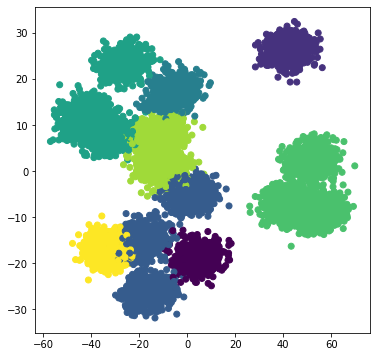

In [79]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

###หาค่า k ด้วยวิธี  elbow method 

In [80]:
kmeans.inertia_  

5136927.9223541105

In [81]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    XX = kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [82]:
SSE

[20638831.92010504,
 12176335.794695133,
 10196224.23516815,
 8970661.80275478,
 7903901.912406155,
 6875446.393153721,
 6150175.424016003,
 5136927.9223541105]

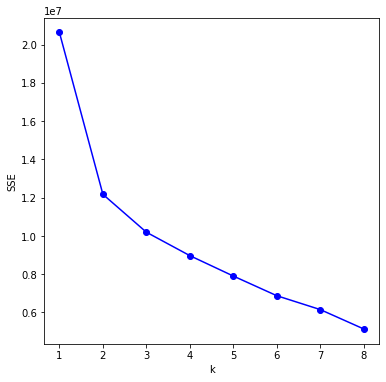

In [83]:
#นำค่า SSE ที่ได้มา plot กราฟเพื่อดูว่ามี k กี่กลุ่ม
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')
plt.xlabel('k')
plt.ylabel('SSE');

k=3 กลุ่ม เพราะ k=3 อยู่ตรงข้อศอก


###หาค่า k ด้วยวิธี silhouette coefficient 

In [86]:
from sklearn import metrics #import function metrics 

In [87]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters = k , random_state = 2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

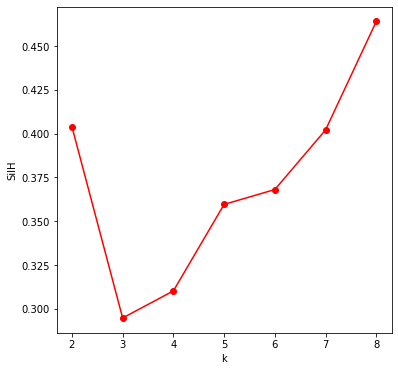

In [88]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-r')
plt.xlabel('k')
plt.ylabel('SilH');

ValueError: ignored

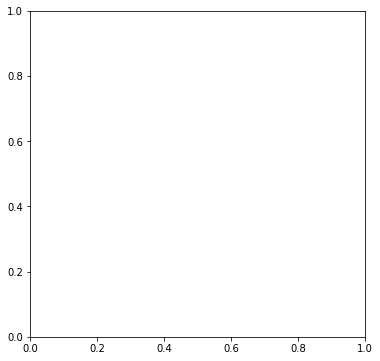

In [91]:
kmeans = KMeans(n_clusters= 3,random_state=2021)
kmeans.fit(newdata)
y = kmeans.predict(newdata)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.6)

จากกราฟ มี k = 3 กลุ่ม และมีข้อมูลบางส่วนที่ทับซ้อนก่อน

**3.ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ**

##MDS

In [64]:
from sklearn.manifold import MDS

In [65]:
mds = MDS(n_components=2)

In [66]:
new_mds = mds.fit_transform(Data)

KeyboardInterrupt: ignored

In [ ]:
new_mds.shape

In [ ]:
new_mds

In [ ]:
kmeans2 = KMeans(n_clusters=3,random_state=2021)
kmeans2.fit(Data)
ืืn = kmeans2.predict(Data)

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.6)


จากการทำข้อ 2 และข้อ 3 ให้ลดจำนวน Dimension ของข้อมูลก่อน แล้วจึงทำ clustering จึงทำให้ผลลัพธ์ออกมาแตกต่างกัน

**4.เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.**

In [ ]:
kmeans = KMeans(n_clusters= 3,random_state=2021)
kmeans.fit(newdata)
y = kmeans.predict(newdata)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y,alpha=0.6)

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=n,alpha=0.6)
plt.title('DataGenerator')